In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset.csv')
# remove data for 2023,2022,2021 bs 2000 2001
df = df[df['JAHR'] < 2022]
df = df[df['JAHR'] > 2001]
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
24,Alkoholunfälle,insgesamt,2021,202101,16.0,28.0,23.08,-42.86,35.0
25,Alkoholunfälle,insgesamt,2021,202102,14.0,40.0,-12.50,-65.00,33.0
26,Alkoholunfälle,insgesamt,2021,202103,24.0,27.0,71.43,-11.11,32.0
27,Alkoholunfälle,insgesamt,2021,202104,16.0,26.0,-33.33,-38.46,32.0
28,Alkoholunfälle,insgesamt,2021,202105,24.0,40.0,50.00,-40.00,30.0


In [20]:
#print all unique values in the first 3 columns
print(df['JAHR'].unique())
print(df['MONATSZAHL'].unique())
print(df['AUSPRAEGUNG'].unique())

[2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008
 2007 2006 2005 2004 2003 2002]
['Alkoholunfälle' 'Fluchtunfälle' 'Verkehrsunfälle']
['insgesamt' 'Verletzte und Getötete' 'mit Personenschäden']


In [21]:
# rename the columns
# MONATSZAHL -> Category
# AUSPRAEGUNG -> Accident-type
# JAHR -> Year
# MONAT -> Month
# WERT -> Value
# VERAEND_VORMONAT_PROZENT -> CHANGE FROM PREVIOUS MONTH PERCENTAGE
# VORJAHRESWERT -> PREVIOUS YEAR VALUE
# VERAEND_VORJAHRESMONAT_PROZENT -> CHANGE FROM PREVIOUS YEAR MONTH PERCENTAGE
# ZWOELF_MONATE_MITTELWERT -> TWELVE MONTHS AVERAGE
df = df.rename(columns={'MONATSZAHL': 'Category', 'AUSPRAEGUNG': 'Accident-type', 'JAHR': 'Year', 'MONAT': 'Month', 'WERT': 'Value', 'VERAEND_VORMONAT_PROZENT': 'CHANGE FROM PREVIOUS MONTH PERCENTAGE', 'VORJAHRESWERT': 'PREVIOUS YEAR VALUE', 'VERAEND_VORJAHRESMONAT_PROZENT': 'CHANGE FROM PREVIOUS YEAR MONTH PERCENTAGE', 'ZWOELF_MONATE_MITTELWERT': 'TWELVE MONTHS AVERAGE'})
df.head()


,Category,Accident-type,Year,Month,Value,PREVIOUS YEAR VALUE,CHANGE FROM PREVIOUS MONTH PERCENTAGE,CHANGE FROM PREVIOUS YEAR MONTH PERCENTAGE,TWELVE MONTHS AVERAGE
24,Alkoholunfälle,insgesamt,2021,202101,16.0,28.0,23.08,-42.86,35.0
25,Alkoholunfälle,insgesamt,2021,202102,14.0,40.0,-12.50,-65.00,33.0
26,Alkoholunfälle,insgesamt,2021,202103,24.0,27.0,71.43,-11.11,32.0
27,Alkoholunfälle,insgesamt,2021,202104,16.0,26.0,-33.33,-38.46,32.0
28,Alkoholunfälle,insgesamt,2021,202105,24.0,40.0,50.00,-40.00,30.0


In [22]:
# rename all the values of the category
# 'Alkoholunfälle' -> 'Alcohol accidents'
# 'Fluchtunfälle' -> 'Hit and run accidents'
# 'Verkehrsunfälle' -> 'Traffic accidents'
df['Category'] = df['Category'].replace(['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle'], ['Alcohol accidents', 'Hit and run accidents', 'Traffic accidents'])
df.head()

,Category,Accident-type,Year,Month,Value,PREVIOUS YEAR VALUE,CHANGE FROM PREVIOUS MONTH PERCENTAGE,CHANGE FROM PREVIOUS YEAR MONTH PERCENTAGE,TWELVE MONTHS AVERAGE
24,Alcohol accidents,insgesamt,2021,202101,16.0,28.0,23.08,-42.86,35.0
25,Alcohol accidents,insgesamt,2021,202102,14.0,40.0,-12.50,-65.00,33.0
26,Alcohol accidents,insgesamt,2021,202103,24.0,27.0,71.43,-11.11,32.0
27,Alcohol accidents,insgesamt,2021,202104,16.0,26.0,-33.33,-38.46,32.0
28,Alcohol accidents,insgesamt,2021,202105,24.0,40.0,50.00,-40.00,30.0


In [23]:
# rename all the values of the accident-type
# 'insgesamt' -> 'Total'
# 'Verletzte und Getötete' -> 'Injured and killed'
# 'mit Personenschäden' -> 'With personal injury'
df['Accident-type'] = df['Accident-type'].replace(['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden'], ['Total', 'Injured and killed', 'With personal injury'])
df.head()

,Category,Accident-type,Year,Month,Value,PREVIOUS YEAR VALUE,CHANGE FROM PREVIOUS MONTH PERCENTAGE,CHANGE FROM PREVIOUS YEAR MONTH PERCENTAGE,TWELVE MONTHS AVERAGE
24,Alcohol accidents,Total,2021,202101,16.0,28.0,23.08,-42.86,35.0
25,Alcohol accidents,Total,2021,202102,14.0,40.0,-12.50,-65.00,33.0
26,Alcohol accidents,Total,2021,202103,24.0,27.0,71.43,-11.11,32.0
27,Alcohol accidents,Total,2021,202104,16.0,26.0,-33.33,-38.46,32.0
28,Alcohol accidents,Total,2021,202105,24.0,40.0,50.00,-40.00,30.0


In [24]:
# check for missing values
print(df.isnull().sum())

Category                                      0
Accident-type                                 0
Year                                          0
Month                                         0
Value                                         0
PREVIOUS YEAR VALUE                           0
CHANGE FROM PREVIOUS MONTH PERCENTAGE         1
CHANGE FROM PREVIOUS YEAR MONTH PERCENTAGE    1
TWELVE MONTHS AVERAGE                         0
dtype: int64


In [25]:
df = df.set_index('Month')

In [26]:
#edit the month column which has values in format 202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108, 202109, 202110, 202111, 202112
#edit them to 01/2021, 02/2021, 03/2021, 04/2021, 05/2021, 06/2021, 07/2021, 08/2021, 09/2021, 10/2021, 11/2021, 12/2021
# df['Month'] = df['Month'].astype(str)
# df['Month'] = df['Month'].str[:2]
# df['Month'] = df['Month'].astype(int)
# df['Month'] = df['Month'].astype(str)
# df['Month'] = df['Month'].str.zfill(2)
# df['Month'] = df['Month'] + '/' + df['Year'].astype(str)
# df.head()

# # Ensure 'Month' is of type string
# df['Month'] = df['Month'].astype(str)

# # Convert 'YYYYMM' to datetime, then format as 'YYYY/MM'
# df['Month'] = pd.to_datetime(df['Month'], format='%Y%m').dt.strftime('%Y/%m')

# df.head()
df.index = df.index.astype(str)
df.index = df.index.str[:4] + '-' + df.index.str[4:]
df.head()
df = df.drop(['Year'], axis=1)
df.head()





,Category,Accident-type,Value,PREVIOUS YEAR VALUE,CHANGE FROM PREVIOUS MONTH PERCENTAGE,CHANGE FROM PREVIOUS YEAR MONTH PERCENTAGE,TWELVE MONTHS AVERAGE
Month,,,,,,,
2021-01,Alcohol accidents,Total,16.0,28.0,23.08,-42.86,35.0
2021-02,Alcohol accidents,Total,14.0,40.0,-12.50,-65.00,33.0
2021-03,Alcohol accidents,Total,24.0,27.0,71.43,-11.11,32.0
2021-04,Alcohol accidents,Total,16.0,26.0,-33.33,-38.46,32.0
2021-05,Alcohol accidents,Total,24.0,40.0,50.00,-40.00,30.0


In [28]:
# sort the values og the index  
df = df.sort_index()
df.head(20)

,Category,Accident-type,Value,PREVIOUS YEAR VALUE,CHANGE FROM PREVIOUS MONTH PERCENTAGE,CHANGE FROM PREVIOUS YEAR MONTH PERCENTAGE,TWELVE MONTHS AVERAGE
Month,,,,,,,
2002-01,Traffic accidents,With personal injury,328.0,354.0,-13.00,-7.34,494.0
2002-01,Hit and run accidents,Total,852.0,871.0,-9.46,-2.18,948.0
2002-01,Alcohol accidents,Injured and killed,24.0,36.0,4.35,-33.33,32.0
2002-01,Hit and run accidents,Injured and killed,36.0,44.0,-7.69,-18.18,57.0
2002-01,Traffic accidents,Total,3063.0,3348.0,-23.21,-8.51,3786.0
2002-01,Alcohol accidents,Total,44.0,66.0,-33.33,-33.33,69.0
2002-01,Traffic accidents,Injured and killed,431.0,448.0,-14.99,-3.79,620.0
2002-02,Hit and run accidents,Total,817.0,820.0,-4.11,-0.37,948.0
2002-02,Hit and run accidents,Injured and killed,33.0,51.0,-8.33,-35.29,55.0


In [29]:
# make three dataframes for each category and drop  all accident-type column except 'Total'
df_alcohol = df[df['Category'] == 'Alcohol accidents']
df_alcohol = df_alcohol[df_alcohol['Accident-type'] == 'Total']
# df_alcohol = df_alcohol.drop(['Category', 'Accident-type'], axis=1)
df_alcohol.head()
    

,Category,Accident-type,Value,PREVIOUS YEAR VALUE,CHANGE FROM PREVIOUS MONTH PERCENTAGE,CHANGE FROM PREVIOUS YEAR MONTH PERCENTAGE,TWELVE MONTHS AVERAGE
Month,,,,,,,
2002-01,Alcohol accidents,Total,44.0,66.0,-33.33,-33.33,69.0
2002-02,Alcohol accidents,Total,49.0,49.0,11.36,0.00,69.0
2002-03,Alcohol accidents,Total,61.0,63.0,24.49,-3.17,69.0
2002-04,Alcohol accidents,Total,65.0,68.0,6.56,-4.41,68.0
2002-05,Alcohol accidents,Total,58.0,85.0,-10.77,-31.76,66.0


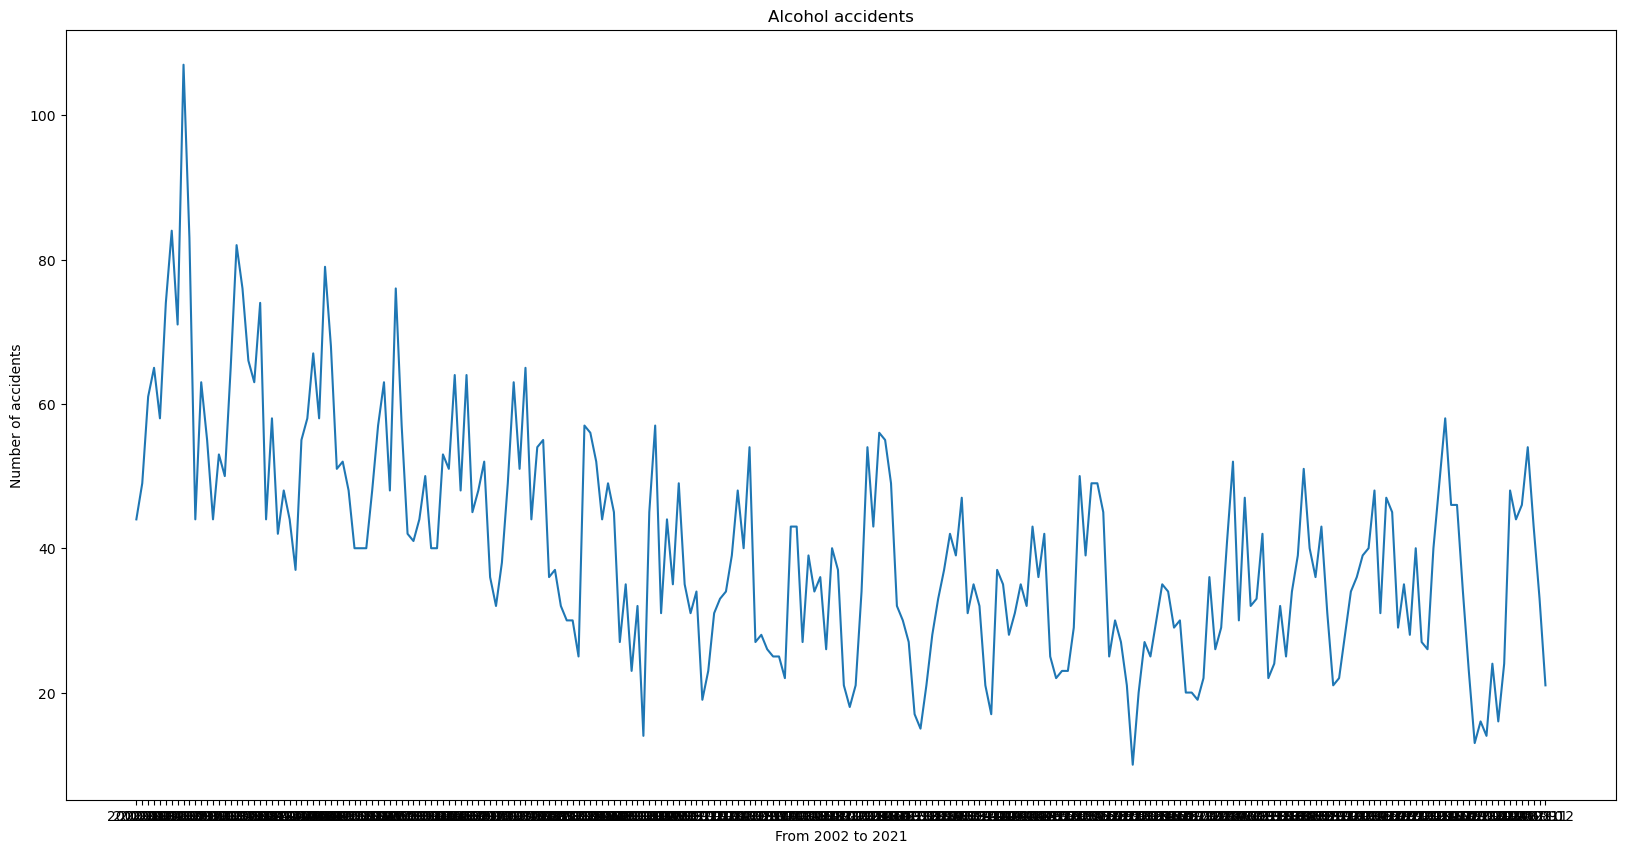

In [30]:
# plot a time series graph for alcohol accidents
import matplotlib.pyplot as plt

def plot_time_series(df, title):
    plt.figure(figsize=(20,10))
    plt.plot(df['Value'])
    plt.title(title)  
    plt.xlabel('From 2002 to 2021')
    plt.ylabel('Number of accidents', )
    plt.show()

# plot for alcohol accidents
plot_time_series(df_alcohol, 'Alcohol accidents')



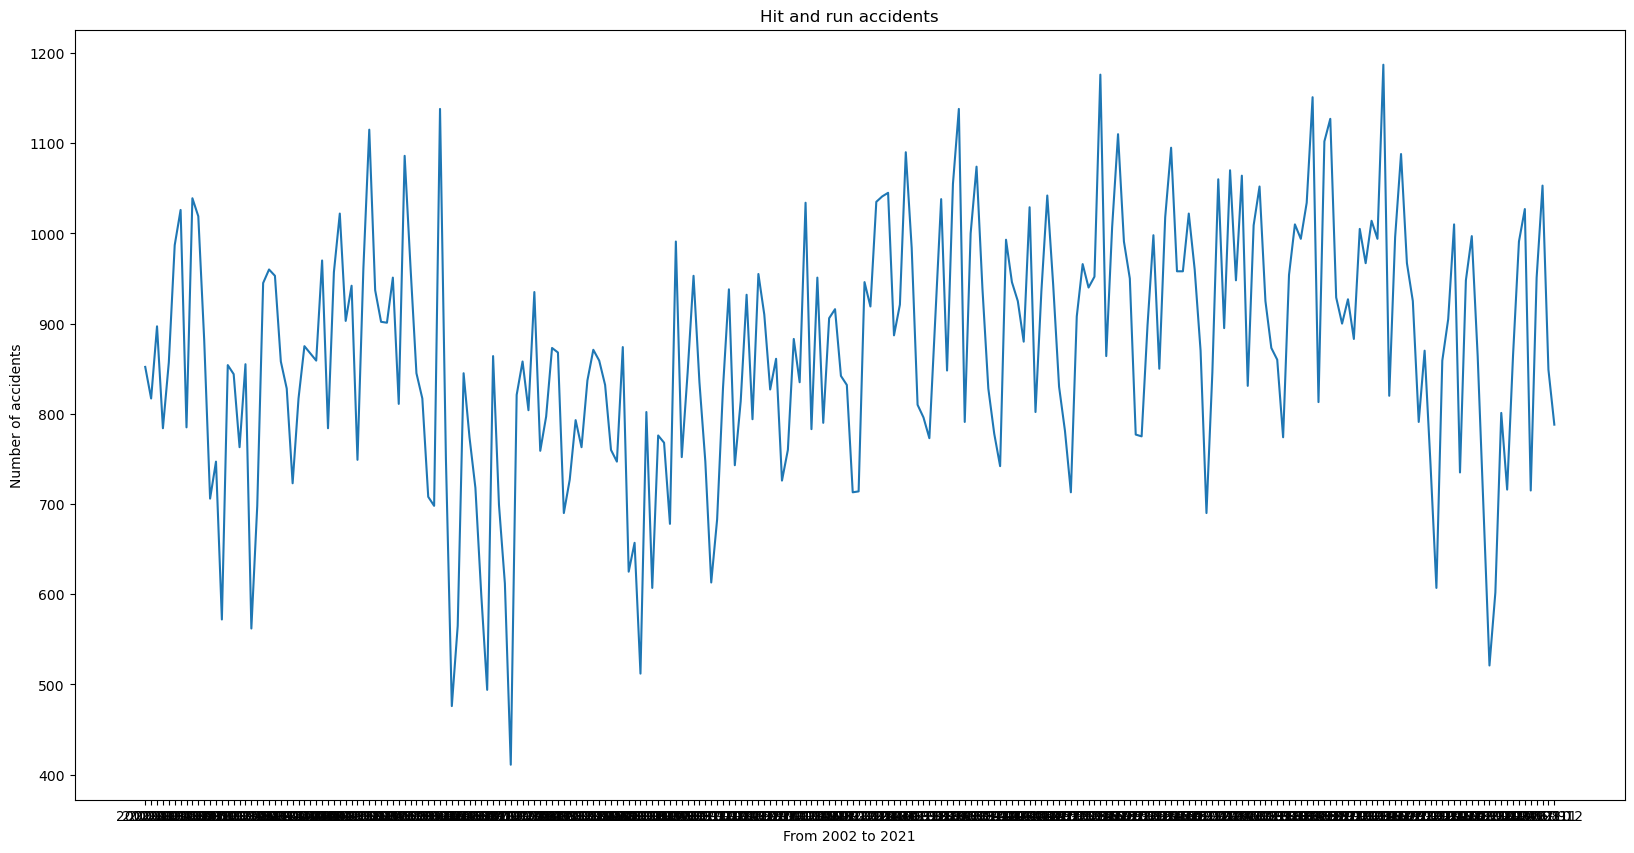

In [31]:
# plot for hit and run accidents
df_hit_and_run = df[df['Category'] == 'Hit and run accidents']
df_hit_and_run = df_hit_and_run[df_hit_and_run['Accident-type'] == 'Total']
# df_hit_and_run = df_hit_and_run.drop(['Category', 'Accident-type'], axis=1)
# df_hit_and_run.head()
plot_time_series(df_hit_and_run, 'Hit and run accidents')

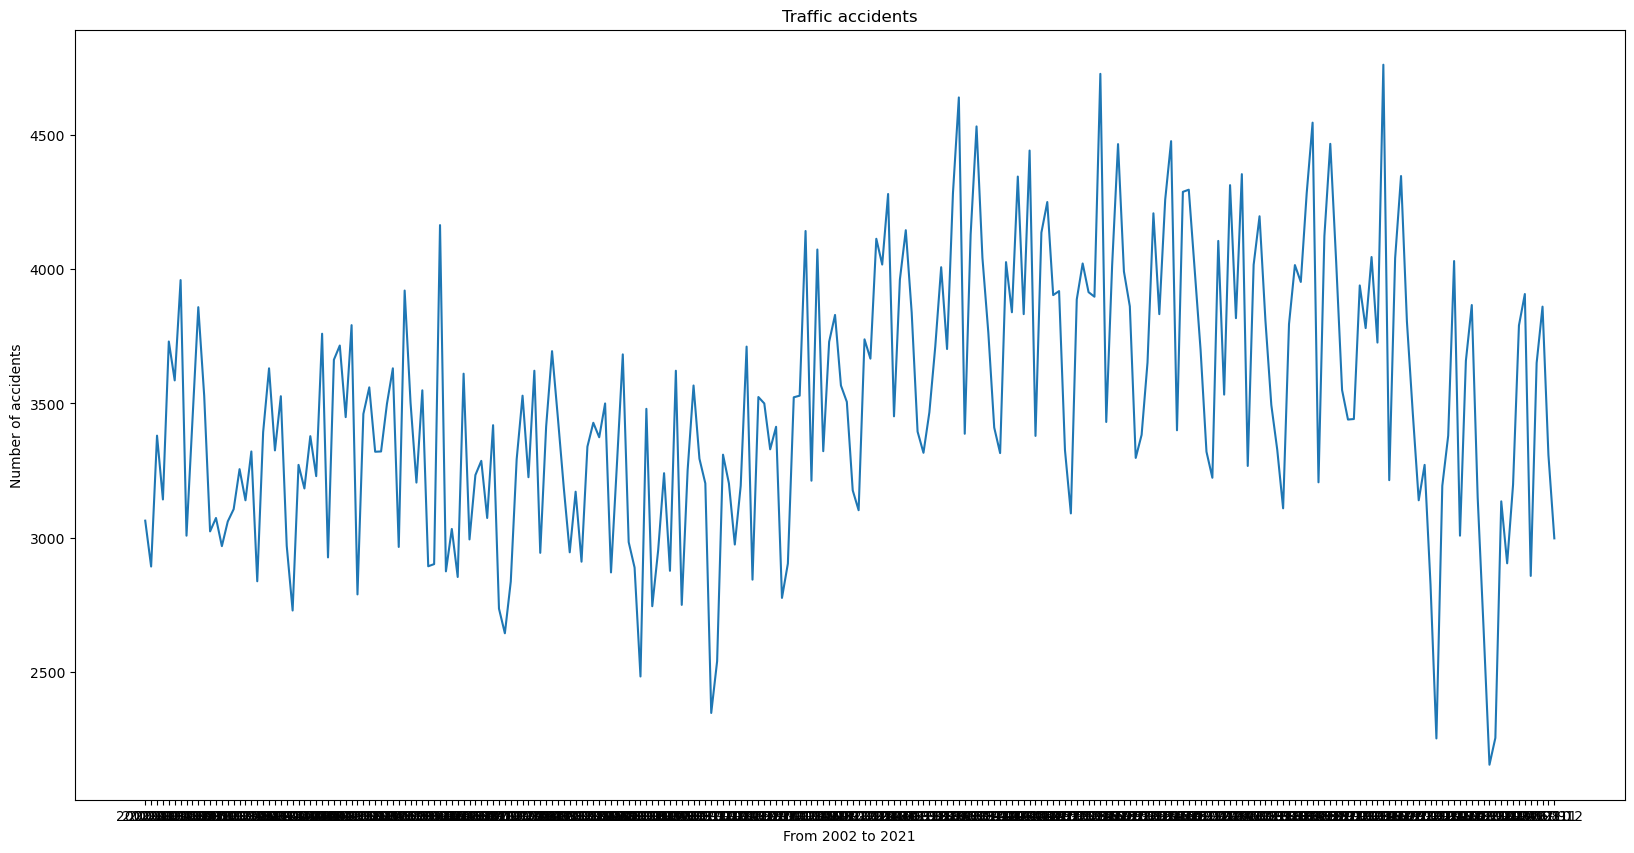

In [32]:
# plot for traffic accidents
df_traffic = df[df['Category'] == 'Traffic accidents']
df_traffic = df_traffic[df_traffic['Accident-type'] == 'Total']
# df_traffic = df_traffic.drop(['Category', 'Accident-type'], axis=1)
# df_traffic.head()
plot_time_series(df_traffic, 'Traffic accidents')
    

<AxesSubplot:>

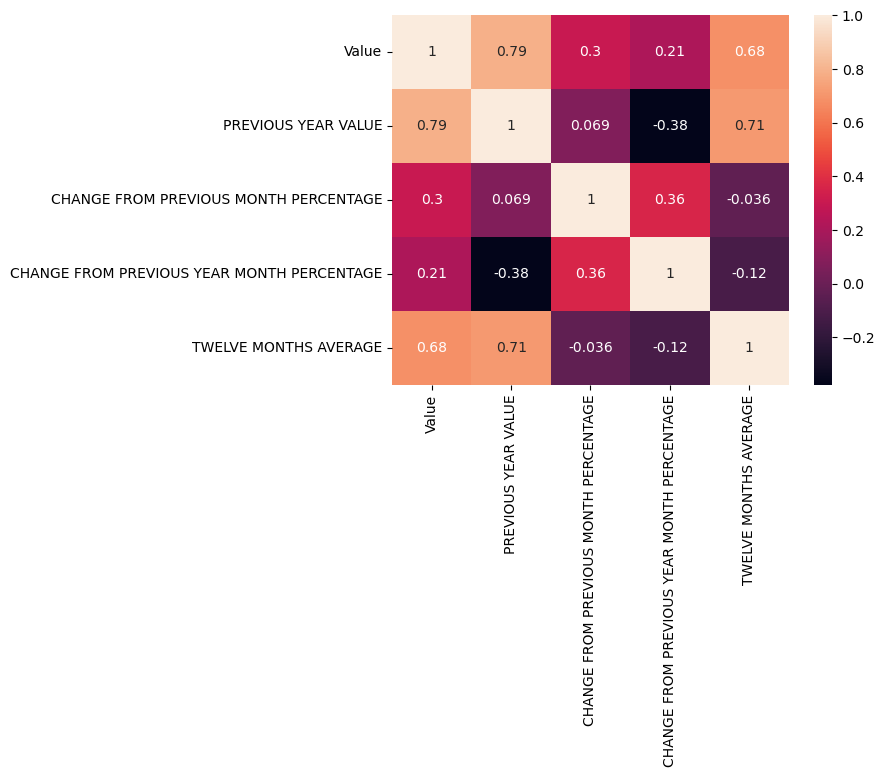

In [33]:
# check for the correlation between the columns for alcohol accidents
import seaborn as sns
sns.heatmap(df_alcohol.corr(), annot=True)

<AxesSubplot:>

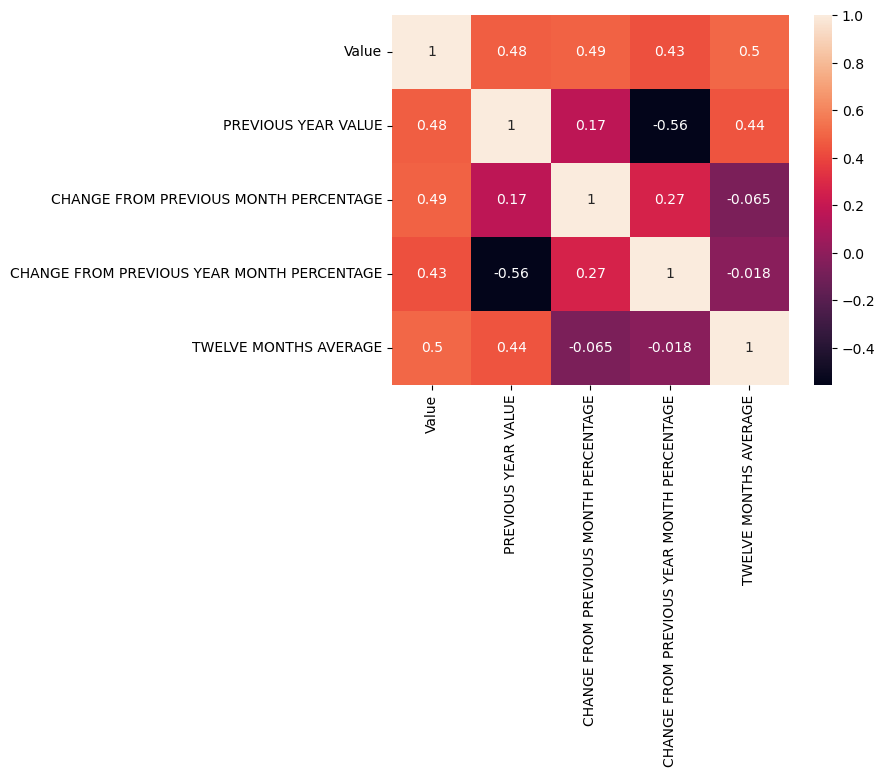

In [34]:
#  check for the correlation between the columns for hit and run accidents
sns.heatmap(df_hit_and_run.corr(), annot=True)

<AxesSubplot:>

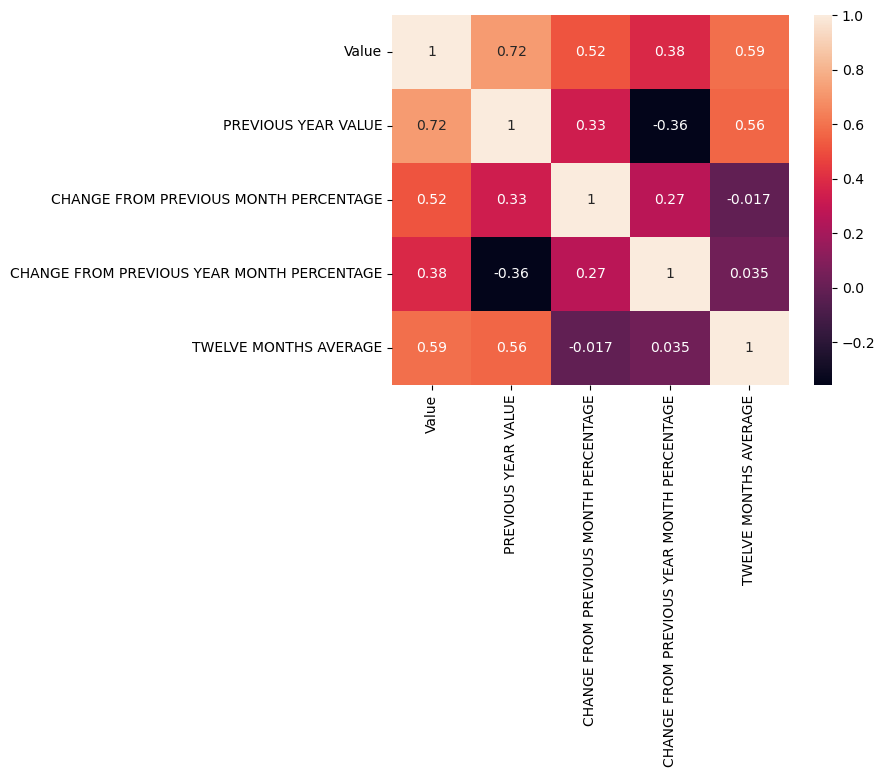

In [35]:
#  check for the correlation between the columns for traffic accidents
sns.heatmap(df_traffic.corr(), annot=True)

<AxesSubplot:>

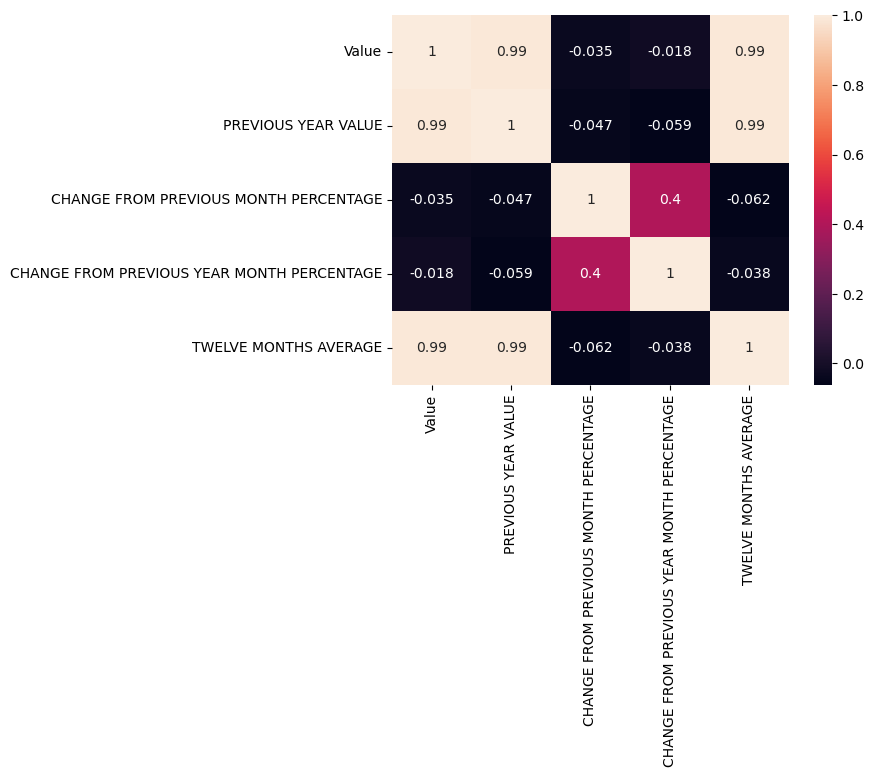

In [36]:
#  check for the correlation between the columns for all accidents
sns.heatmap(df.corr(), annot=True)
    

In [37]:
# check the stationarity of the data for alcohol accidents, hit and run accidents, traffic accidents and all accidents
from statsmodels.tsa.stattools import adfuller
    
def adf_test(df):
    dftest = adfuller(df, autolag='AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
        
adf_test(df_alcohol['Value'])
adf_test(df_hit_and_run['Value'])
adf_test(df_traffic['Value'])
adf_test(df['Value'])

1. ADF :  -2.778113900795097
2. P-Value :  0.06146868838034185
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression: 226
5. Critical Values :
	 1% :  -3.4596204846395824
	 5% :  -2.8744153028455948
	 10% :  -2.5736320761218576
1. ADF :  -2.0873337286543263
2. P-Value :  0.24963817976658997
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression: 226
5. Critical Values :
	 1% :  -3.4596204846395824
	 5% :  -2.8744153028455948
	 10% :  -2.5736320761218576
1. ADF :  -1.7382724042065731
2. P-Value :  0.4115090202232703
3. Num Of Lags :  15
4. Num Of Observations Used For ADF Regression: 224
5. Critical Values :
	 1% :  -3.459884913337196
	 5% :  -2.8745310704320794
	 10% :  -2.573693840082908
1. ADF :  -20.36572330927696
2. P-Value :  0.0
3. Num Of Lags :  7
4. Num Of Observations Used For ADF Regression: 1672
5. Critical Values :
	 1% :  -3.4342670860570723
	 5% :  -2.8632701714229905
	 10% :  -2.567691100492777
